In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval

# Load the embeddings
datafile_path = "data/fine_food_reviews_with_embeddings_1k.csv"
df = pd.read_csv(datafile_path)

# Convert to a list of lists of floats
matrix = np.array(df.embedding.apply(literal_eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(1000, 2)

Text(0.5, 1.0, 'Amazon ratings visualized in language using t-SNE')

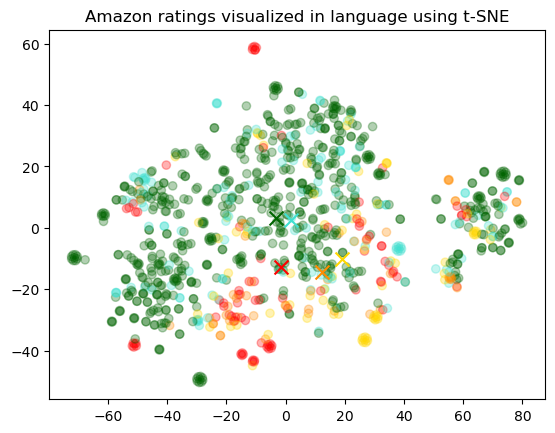

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = df.Score.values - 1

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for score in [0,1,2,3,4]:
    avg_x = np.array(x)[df.Score-1==score].mean()
    avg_y = np.array(y)[df.Score-1==score].mean()
    color = colors[score]
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

plt.title("Amazon ratings visualized in language using t-SNE")

In [4]:
import pandas as pd
import numpy as np
from ast import literal_eval

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# datafile_path = "data/fine_food_reviews_with_embeddings_1k.csv"

# df = pd.read_csv(datafile_path)
df["embedding"] = df.embedding.apply(literal_eval).apply(np.array)

X_train, X_test, y_train, y_test = train_test_split(list(df.embedding.values), df.Score, test_size=0.2, random_state=42)

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
preds = rfr.predict(X_test)

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)

print(f"text-embedding-3-small performance on 1k Amazon reviews: mse={mse:.2f}, mae={mae:.2f}")


text-embedding-3-small performance on 1k Amazon reviews: mse=0.64, mae=0.51


In [5]:
bmse = mean_squared_error(y_test, np.repeat(y_test.mean(), len(y_test)))
bmae = mean_absolute_error(y_test, np.repeat(y_test.mean(), len(y_test)))
print(
    f"Dummy mean prediction performance on Amazon reviews: mse={bmse:.2f}, mae={bmae:.2f}"
)


Dummy mean prediction performance on Amazon reviews: mse=1.73, mae=1.03


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [8]:
preds

array([5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 2, 5, 1, 5, 5,
       5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5,
       5, 5, 5, 4, 5, 5, 1, 5, 5, 4, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5], dtype=int64)

In [7]:
from utils.embedding_utils import cosine_similarity, get_embedding


In [12]:

df= df[df.Score!=3]
df['sentiment'] = df.Score.replace({1:'negative', 2:'negative', 4:'positive', 5:'positive'})

labels = ['negative', 'positive']
label_embeddings = [get_embedding(label) for label in labels]

def label_score(review_embedding, label_embeddings):
   return cosine_similarity(review_embedding, label_embeddings[1]) - cosine_similarity(review_embedding, label_embeddings[0])

prediction = 'positive' if label_score(get_embedding('Sample Review'), label_embeddings) > 0 else 'negative'

In [13]:
prediction

'positive'

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  925 non-null    int64 
 1   ProductId   925 non-null    object
 2   UserId      925 non-null    object
 3   Score       925 non-null    int64 
 4   Summary     925 non-null    object
 5   Text        925 non-null    object
 6   combined    925 non-null    object
 7   n_tokens    925 non-null    int64 
 8   embedding   925 non-null    object
 9   sentiment   925 non-null    object
dtypes: int64(3), object(7)
memory usage: 79.5+ KB


In [16]:
import numpy as np
from sklearn.cluster import KMeans

matrix = np.vstack(df.embedding.values)
n_clusters = 4

kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)
df['Cluster'] = kmeans.labels_

c:\Users\Sahil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sahil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [17]:
df.groupby("Cluster").Score.mean().sort_values()

Cluster
2    1.884298
1    4.369748
3    4.558824
0    4.829978
Name: Score, dtype: float64

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

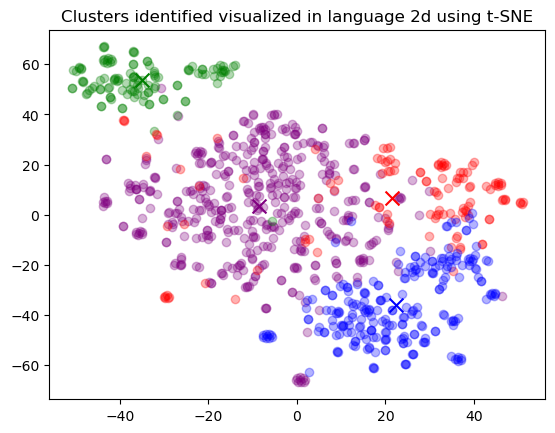

In [18]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")


In [19]:
from openai import OpenAI
import os

client = OpenAI()

# Reading a review which belong to each group.
rev_per_cluster = 5

for i in range(n_clusters):
    print(f"Cluster {i} Theme:", end=" ")

    reviews = "\n".join(
        df[df.Cluster == i]
        .combined.str.replace("Title: ", "")
        .str.replace("\n\nContent: ", ":  ")
        .sample(rev_per_cluster, random_state=42)
        .values
    )

    messages = [
        {"role": "user", "content": f'What do the following customer reviews have in common?\n\nCustomer reviews:\n"""\n{reviews}\n"""\n\nTheme:'}
    ]

    response = client.chat.completions.create(
        model="gpt-4",
        messages=messages,
        temperature=0,
        max_tokens=64,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0)
    print(response.choices[0].message.content.replace("\n", ""))

    sample_cluster_rows = df[df.Cluster == i].sample(rev_per_cluster, random_state=42)
    for j in range(rev_per_cluster):
        print(sample_cluster_rows.Score.values[j], end=", ")
        print(sample_cluster_rows.Summary.values[j], end=":   ")
        print(sample_cluster_rows.Text.str[:70].values[j])

    print("-" * 100)


Cluster 0 Theme: Food products.
4, Finally!:   At last a sweetener with hardly any of that nasty aftertaste! There is
5, Party Peanuts:   Great product for the price. Mix with the Asian rice crackers for an e
5, Dat'l Do It spicy Pepper Sauce:   This sauce is hot, tasty and spicy! Much hotter than other Datil peppe
5, Michael Seasons Unsalted Potato Chips:   These are the best chips ever!  They are unsalted and being on a low s
5, Makes me drool just thinking of them:   The Brit's have out done us. The flavor is supreme,they satisfy my hun
----------------------------------------------------------------------------------------------------
Cluster 1 Theme: The theme of these reviews is pet food and treats.
1, My Chihuahuas HATE This Product:   My two Chihuahuas loved "Cadet Gourmet Pet Treats Duck Breast Fillets"
5, Dogs love it.:   This is the "all gone" treat after dinner.  It's the only treat that t
2, Triggered strange vomit response to my dog:   I can't deny that these smell amazin